## Learning from Imbalanced Datasets (Supervised and Unsupervised Learning)

### Registration Number : 2100346

## Heart attack classification

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from imblearn.datasets import make_imbalance

C:\Users\mindr\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# loading dataset from github

data = pd.read_csv('https://raw.githubusercontent.com/winsid07/CE888-/main/Data/Heart_Attack_Classification.csv')
data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### Data exploration

In [3]:
df = data.copy()
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.shape    

(303, 14)

In [5]:
# dataset detailed info

df.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
# Missing values

df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [7]:
# Data Summary

df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
df.duplicated().sum()                        #There is one duplicate row

1

In [9]:
#Dropping duplicate row
df.drop_duplicates(subset=None, keep='first', inplace= True)

In [10]:
df.duplicated().sum()                        

0

### Data visualization

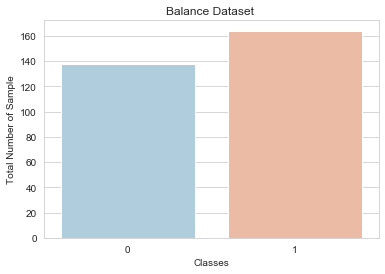

In [11]:
# Target outout class

sns.set_style('whitegrid')
fig= sns.countplot(x= df['output'],data=df,palette='RdBu_r').get_figure()
plt.title('Balance Dataset ')
plt.xlabel('Classes')
plt.ylabel('Total Number of Sample')
plt.show()
fig.savefig('histogram_org_heart.pdf')

In [12]:
# Distribution of target class
target_count = df['output'].value_counts()
target_count

1    164
0    138
Name: output, dtype: int64

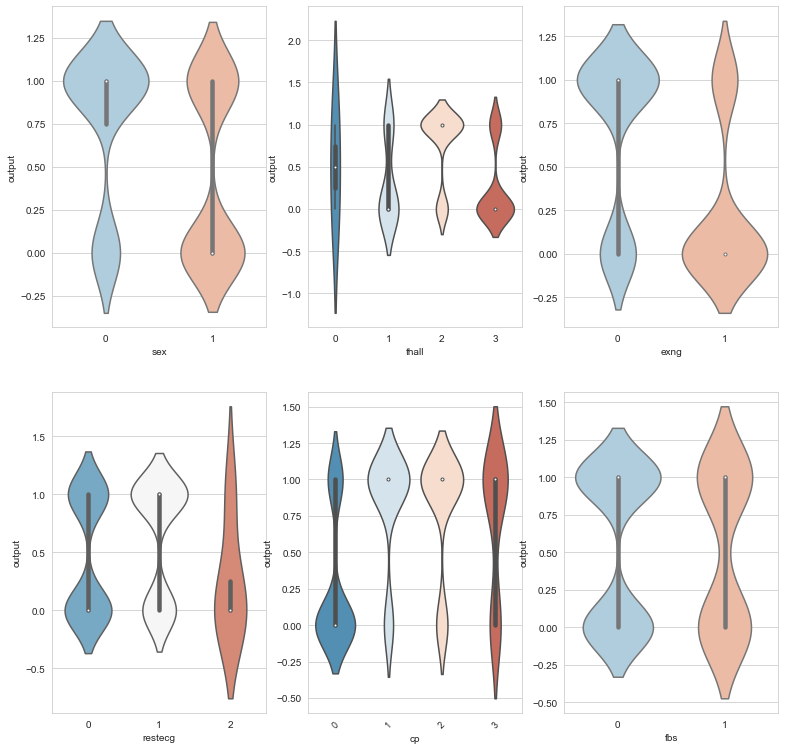

In [13]:
#Violin plot

plt.figure(figsize=(13,13))
plt.subplot(2,3,1)
sns.violinplot(x = 'sex', y = 'output', data = df, palette='RdBu_r')
plt.subplot(2,3,2)
sns.violinplot(x = 'thall', y = 'output', data = df, palette='RdBu_r')
plt.subplot(2,3,3)
sns.violinplot(x = 'exng', y = 'output', data = df, palette='RdBu_r')
plt.subplot(2,3,4)
sns.violinplot(x = 'restecg', y = 'output', data = df, palette='RdBu_r')
plt.subplot(2,3,5)
sns.violinplot(x = 'cp', y = 'output', data = df, palette='RdBu_r')
plt.xticks(fontsize=9, rotation=45)
plt.subplot(2,3,6)
sns.violinplot(x = 'fbs', y = 'output', data = df, palette='RdBu_r')

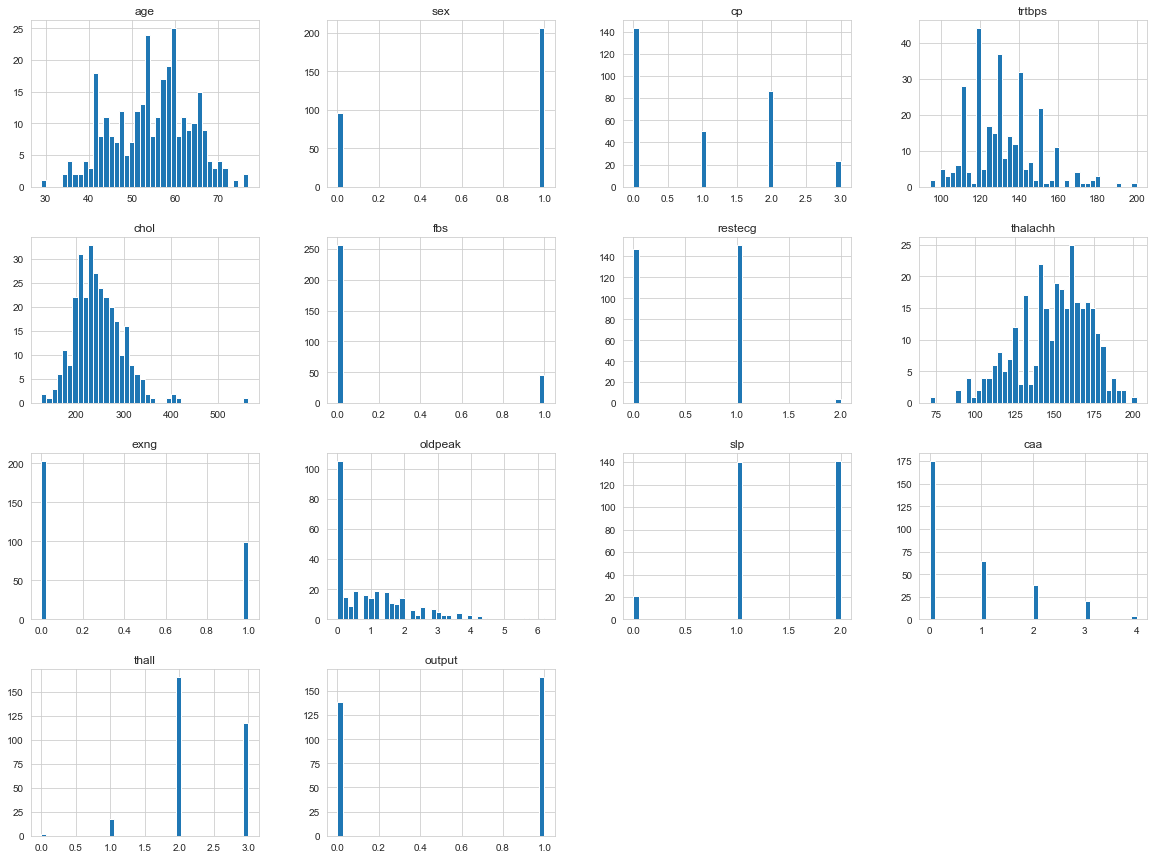

In [14]:
# Histogram Plots
pl = df.hist(bins=40, figsize=(20,15))

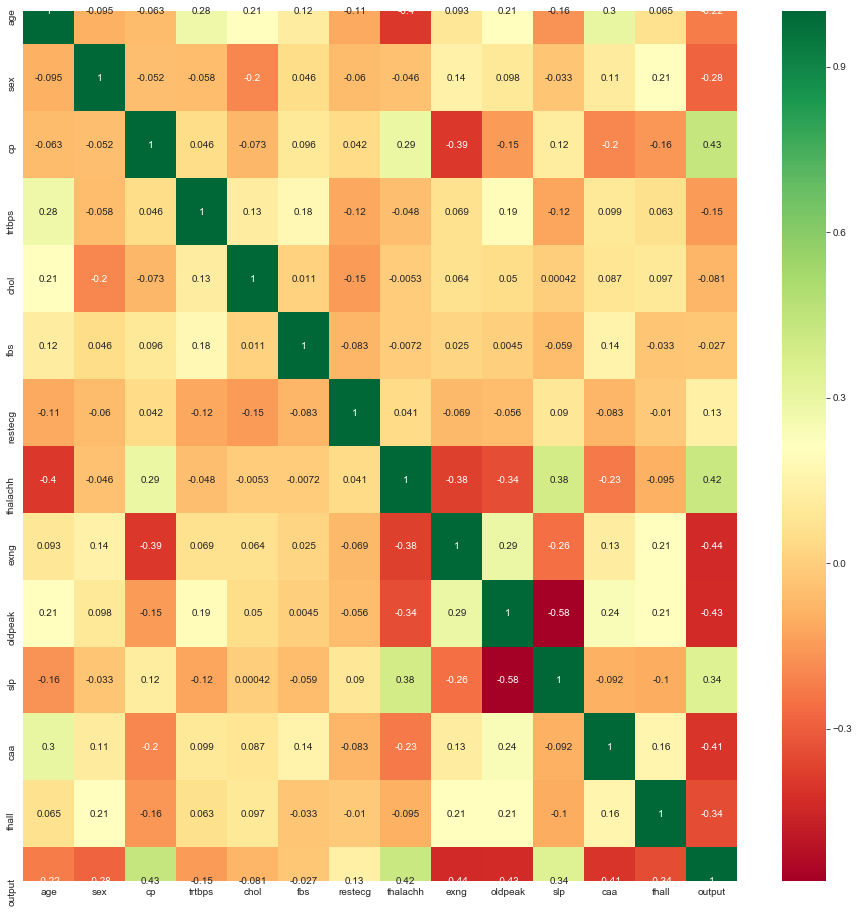

In [15]:
#correlations and ploting a heatmap

corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(16,16))

g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")
plt.show()

### Balanced dataset

In [16]:
#Checking the distributation

print(f'Distribution before imbalancing') 

target_count=df['output'].value_counts()
print(target_count)

imbalance_target=(target_count[1] /(target_count[0] + target_count[1])) * 100
print(f'Balanced Percentage : {imbalance_target} %')

imbalance_target=(target_count[0] / (target_count[0] + target_count[1])) * 100
print(f'Balanced Percentage : {imbalance_target} %')

Distribution before imbalancing
1    164
0    138
Name: output, dtype: int64
Balanced Percentage : 54.3046357615894 %
Balanced Percentage : 45.6953642384106 %


In [17]:
y_org = df['output']
x_org = df.drop(['output'],axis=1)

### New Imbalance

In [18]:
# Low Imbalance (65%)

x_low, y_low = make_imbalance(x_org, y_org, sampling_strategy = {0: 88 , 1: 164}, random_state = 42)


print(f'Distribution after low imbalancing') 

low_target_count= y_low.value_counts()
print(low_target_count)

low_imbalance_target=(low_target_count[1] /(low_target_count[0] + low_target_count[1])) * 100
print(f'Imbalance Percentage : {low_imbalance_target} %')

low_imbalance_target=(low_target_count[0] / (low_target_count[0] + low_target_count[1])) * 100
print(f'Imbalance Percentage : {low_imbalance_target} %')

Distribution after low imbalancing
1    164
0     88
Name: output, dtype: int64
Imbalance Percentage : 65.07936507936508 %
Imbalance Percentage : 34.92063492063492 %


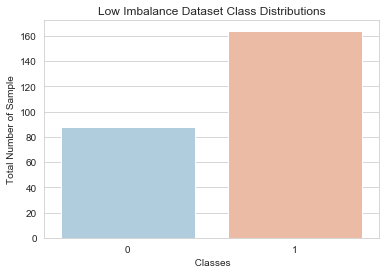

In [19]:
# Saving the fig

sns.set_style('whitegrid')
fig = sns.countplot(x = y_low,data=df,palette='RdBu_r').get_figure()
plt.title('Low Imbalance Dataset Class Distributions')
plt.xlabel(' Classes')
plt.ylabel('Total Number of Sample')
plt.show()
fig.savefig('histogram_low_heart.pdf')

In [20]:
# Medium Imbalance (75%)

x_medium, y_medium = make_imbalance(x_org, y_org, sampling_strategy = {0: 54 , 1: 164}, random_state = 42)


print(f'Distribution after medium imbalancing') 

medium_target_count= y_medium.value_counts()
print(medium_target_count)

medium_imbalance_target=(medium_target_count[1] /(medium_target_count[0] + medium_target_count[1])) * 100
print(f'Medium Imbalance Percentage : {medium_imbalance_target} %')


medium_imbalance_target=(medium_target_count[0] /(medium_target_count[0] + medium_target_count[1])) * 100
print(f'Medium Imbalance Percentage : {medium_imbalance_target} %')


Distribution after medium imbalancing
1    164
0     54
Name: output, dtype: int64
Medium Imbalance Percentage : 75.22935779816514 %
Medium Imbalance Percentage : 24.770642201834864 %


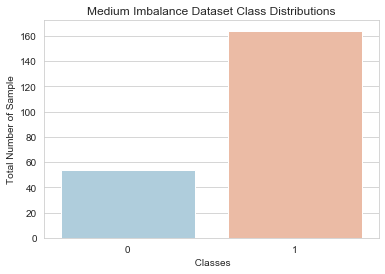

In [21]:
#Saving figure

sns.set_style('whitegrid')
fig = sns.countplot(x = y_medium,data=df,palette='RdBu_r').get_figure()
plt.title('Medium Imbalance Dataset Class Distributions')
plt.xlabel(' Classes')
plt.ylabel('Total Number of Sample')
plt.show()

fig.savefig('histogram_medium_heart.pdf')

In [22]:
# High Imbalance (90%)

x_high, y_high = make_imbalance(x_org, y_org, sampling_strategy = {0: 18 , 1: 164}, random_state = 42)


print(f'Distribution after high imbalancing') 

high_target_count= y_high.value_counts()
print(high_target_count)

high_imbalance_target=(high_target_count[1] /(high_target_count[0] + high_target_count[1])) * 100
print(f'High Imbalance Percentage : {high_imbalance_target} %')

high_imbalance_target=(high_target_count[0] /(high_target_count[0] + high_target_count[1])) * 100
print(f'High Imbalance Percentage : {high_imbalance_target} %')


Distribution after high imbalancing
1    164
0     18
Name: output, dtype: int64
High Imbalance Percentage : 90.10989010989012 %
High Imbalance Percentage : 9.89010989010989 %


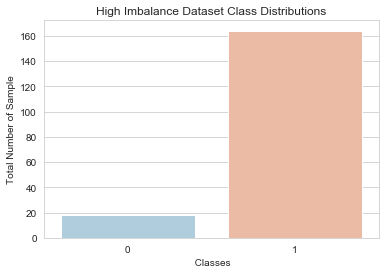

In [23]:
#Saving figure

sns.set_style('whitegrid')
fig = sns.countplot(x = y_high,data=df,palette='RdBu_r').get_figure()
plt.title('High Imbalance Dataset Class Distributions')
plt.xlabel(' Classes')
plt.ylabel('Total Number of Sample')
plt.show()

fig.savefig('histogram_high_heart.pdf')

# Low imabalance

In [24]:
data_low = pd.read_csv('Heart_Attack_Low_Imb.csv')
data_med = pd.read_csv('Heart_Attack_Medium_Imb.csv')
data_high = pd.read_csv('Heart_Attack_High_Imb.csv')

In [25]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import make_scorer

## Train and Test Data split

In [26]:
X=data_low.iloc[:,:-1]
y=data_low.iloc[:,-1]
d = df.copy()

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

## Baseline 1: Random Forest

C:\Users\mindr\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.80      0.63      0.71        19
           1       0.81      0.91      0.85        32

    accuracy                           0.80        51
   macro avg       0.80      0.77      0.78        51
weighted avg       0.80      0.80      0.80        51



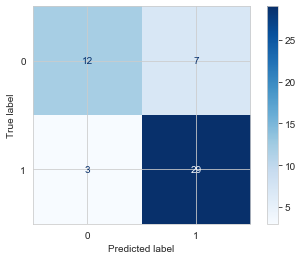

In [28]:
clf_rf=RandomForestClassifier(n_jobs=2,random_state=0)
clf_rf.fit(X_train,y_train)
y_predict=clf_rf.predict(X_test)
plot_confusion_matrix(clf_rf,X_test,y_test, cmap=plt.cm.Blues)
print(classification_report(y_test, y_predict))

In [29]:
score1_rf=accuracy_score(y_test,y_predict)
print("Accuracy (without cross-validation) : {}".format(score1_rf))

score2_rf = cross_val_score(clf_rf, X_train, y_train, cv=10)
print(score2_rf)
print("Accuracy (after cross-validation): {} (+/- {})".format(score2_rf.mean(),score2_rf.std()))

score3_rf = cross_val_score(clf_rf, X_train, y_train, cv=10,scoring=make_scorer(cohen_kappa_score))
print(score3_rf)
print("Cohen Kappa Score (after cross-validation): {} (+/- {})".format(score3_rf.mean(),score3_rf.std()))

Accuracy (without cross-validation) : 0.803921568627451
[0.76190476 0.9        0.95       0.95       1.         1.
 0.85       0.85       0.85       0.95      ]
Accuracy (after cross-validation): 0.9061904761904762 (+/- 0.07327146431587947)
[0.44444444 0.78021978 0.88636364 0.88636364 1.         1.
 0.63414634 0.63414634 0.63414634 0.875     ]
Cohen Kappa Score (after cross-validation): 0.777483052178174 (+/- 0.1745868105873628)


## Partitioning the dataset into 10 bins, keeping the imbalance ratio from the original dataset

In [30]:
target_count=data_low.output.value_counts()
print(target_count)

imbalance_target=(target_count[1]/(target_count[0]+target_count[1]))*100
print(imbalance_target)

1    164
0     88
Name: output, dtype: int64
65.07936507936508


In [41]:
def create_bins (df,no_of_bins,orig_imbalance):
    df_class0=df[df['output']==0]
    df_class1=df[df['output']==1]

    len0=int(len(df_class0)/no_of_bins)
    len1=int(len(df_class1)/no_of_bins)

    ind0=0
    ind1=0
    start0=0
    start1=0

    bins=[]

    
    
    print("Original Imbalance in the dataset: {} %".format(orig_imbalance))
    for i in range(no_of_bins):
        ind0+=len0
        ind1+=len1
        bin_=pd.concat([df_class1.iloc[start1:ind1,:],df_class0.iloc[start0:ind0,:]])
        target_cnt=bin_.output.value_counts()
        imbalance=(target_cnt[1]/(target_cnt[0]+target_cnt[1]))*100
        print("Class imbalance ratio in bin {} : {} %".format(i,imbalance))
        bins.append(bin_.values)
        start0+=len0
        start1+=len1

    return bins

In [42]:
bins= create_bins(data_low,10, imbalance_target) 

Original Imbalance in the dataset: 65.07936507936508 %
Class imbalance ratio in bin 0 : 66.66666666666666 %
Class imbalance ratio in bin 1 : 66.66666666666666 %
Class imbalance ratio in bin 2 : 66.66666666666666 %
Class imbalance ratio in bin 3 : 66.66666666666666 %
Class imbalance ratio in bin 4 : 66.66666666666666 %
Class imbalance ratio in bin 5 : 66.66666666666666 %
Class imbalance ratio in bin 6 : 66.66666666666666 %
Class imbalance ratio in bin 7 : 66.66666666666666 %
Class imbalance ratio in bin 8 : 66.66666666666666 %
Class imbalance ratio in bin 9 : 66.66666666666666 %


In [33]:
model_accuracies={} 
model_kappa_scores={}

## Analyzing the number of clusters using Elbow method and Silhouette method

In [62]:
from sklearn.preprocessing import StandardScaler

i=9 


leave_out=i 
test_data=bins[i] 


bin9=np.vstack((bins[j] for j in range(10) if j!=i )) 
data=pd.DataFrame(bin9)
data.columns=d.columns

X_train=data.iloc[:,1:16]
y_train=data.iloc[:,16:17]
X_test=curr_bin.iloc[:,1:16]
y_test=curr_bin.iloc[:,16:17]

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

C:\Users\mindr\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  from ipykernel import kernelapp as app


silhouette 2th score:0.215085 
Distortion or average SSE for 2th cluster is:3.121019 
silhouette 3th score:0.131665 
Distortion or average SSE for 3th cluster is:2.972892 
silhouette 4th score:0.130009 
Distortion or average SSE for 4th cluster is:2.859980 
silhouette 5th score:0.127919 
Distortion or average SSE for 5th cluster is:2.776404 
silhouette 6th score:0.129511 
Distortion or average SSE for 6th cluster is:2.728152 
silhouette 7th score:0.115637 
Distortion or average SSE for 7th cluster is:2.672195 
silhouette 8th score:0.122496 
Distortion or average SSE for 8th cluster is:2.611455 
silhouette 9th score:0.104241 
Distortion or average SSE for 9th cluster is:2.563532 
silhouette 10th score:0.118721 
Distortion or average SSE for 10th cluster is:2.507977 
silhouette 11th score:0.126406 
Distortion or average SSE for 11th cluster is:2.482576 
silhouette 12th score:0.107871 
Distortion or average SSE for 12th cluster is:2.460790 
silhouette 13th score:0.127974 
Distortion or av

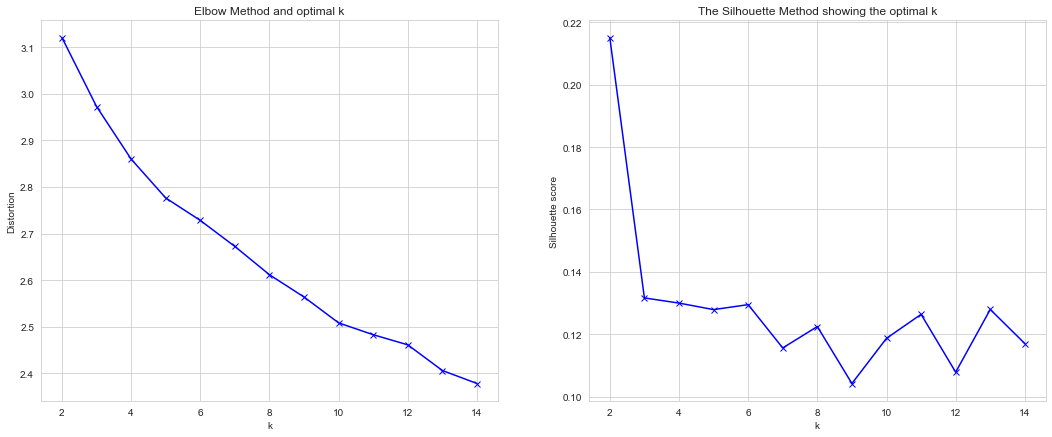

In [63]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

distortions = []
silhouette_scores=[]
K = range(2,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X_train_std)
    kmeanModel.fit(X_train_std)
    labels = kmeanModel.labels_
    silhouette_score=metrics.silhouette_score(X_train_std, labels, metric='euclidean')
    silhouette_scores.append(silhouette_score)
    print("silhouette %dth score:%f "%(k, silhouette_score))
    avg_sse=(sum(np.min(cdist(X_train_std, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X_train_std.shape[0])
    distortions.append(avg_sse)
    print("Distortion or average SSE for %dth cluster is:%f "%(k, avg_sse))

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)
ax1.plot(K, distortions, 'bx-')
ax1.set_xlabel('k')
ax1.set_ylabel('Distortion')
ax1.set_title('Elbow Method and optimal k')
ax2.plot(K, silhouette_scores, 'bx-')
ax2.set_xlabel('k')
ax2.set_ylabel('Silhouette score')
ax2.set_title('The Silhouette Method showing the optimal k')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.21508458133712458
For n_clusters = 3 The average silhouette_score is : 0.1317185941014586
For n_clusters = 4 The average silhouette_score is : 0.13143986091295268
For n_clusters = 5 The average silhouette_score is : 0.1266695831500687
For n_clusters = 6 The average silhouette_score is : 0.13311282342520284
For n_clusters = 7 The average silhouette_score is : 0.12083137896218908
For n_clusters = 8 The average silhouette_score is : 0.11624437750785399


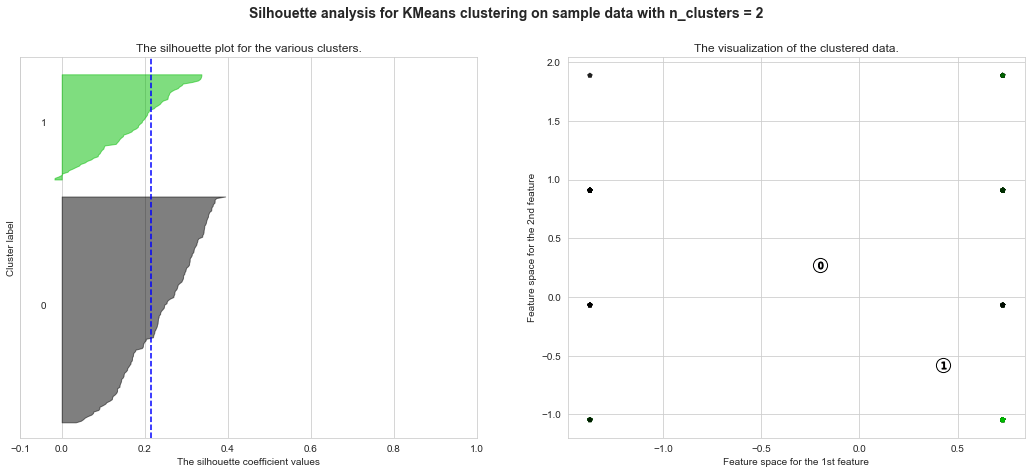

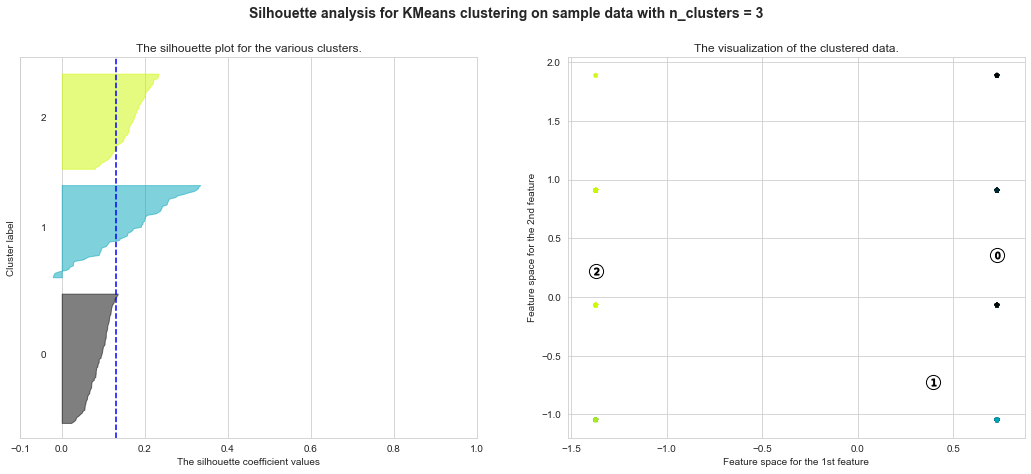

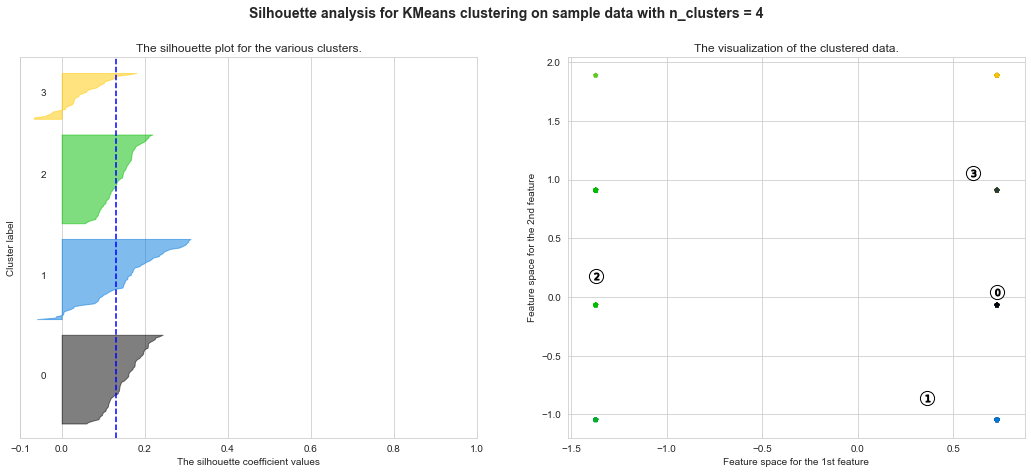

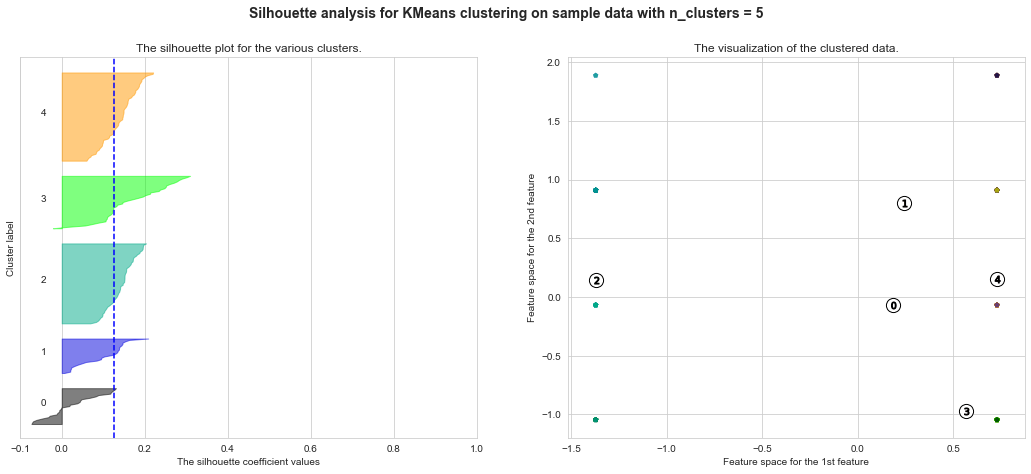

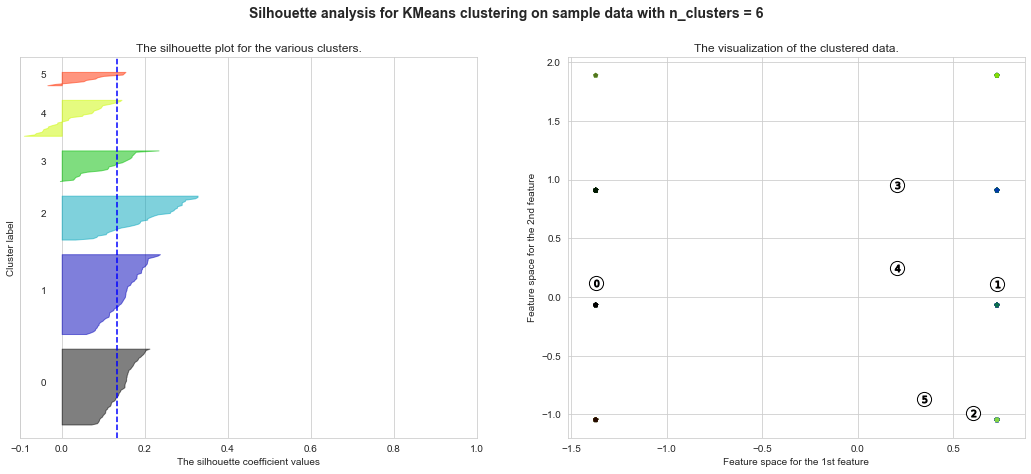

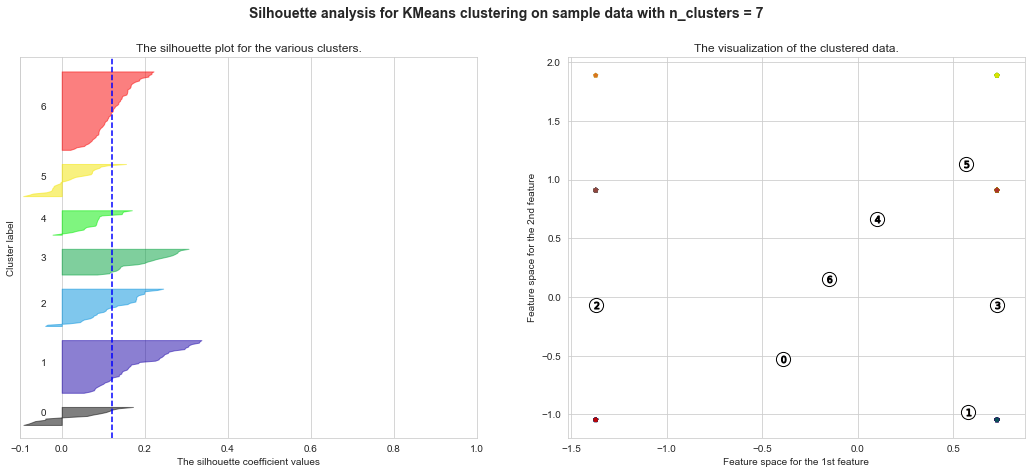

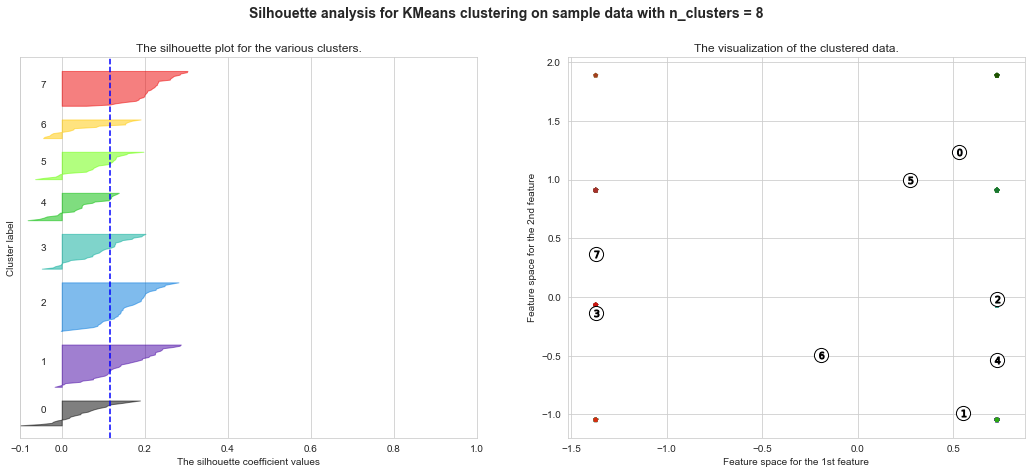

In [64]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


for n_clusters in range(2,9):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X_train_std) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_train_std)


    silhouette_avg = silhouette_score(X_train_std, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    sample_silhouette_values = silhouette_samples(X_train_std, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
       
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.5)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="blue", linestyle="--")

    ax1.set_yticks([])  
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

 
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X_train_std[:, 0], X_train_std[:, 1], marker='p', s=30, lw=0, alpha=0.5,
                c=colors, edgecolor='k')

    
    centers = clusterer.cluster_centers_

    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

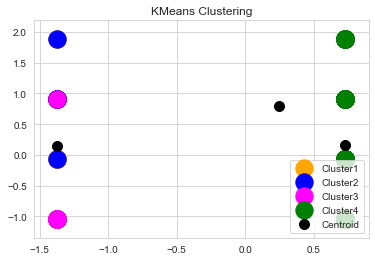

In [65]:

kmeans = KMeans(n_clusters =4, init = 'k-means++', n_init = 10, max_iter = 300, random_state = 0)
y_kmeans = kmeans.fit_predict(X_train_std)
cluster_data=data

cols=list(cluster_data.columns)



plt.scatter(X_train_std[y_kmeans == 0, 0], X_train_std[y_kmeans == 0, 1], s = 300, c = 'orange', label = 'Cluster1')
plt.scatter(X_train_std[y_kmeans == 1, 0], X_train_std[y_kmeans == 1, 1], s = 300, c = 'blue', label = 'Cluster2')
plt.scatter(X_train_std[y_kmeans == 2, 0], X_train_std[y_kmeans == 2, 1], s = 300, c = 'magenta', label = 'Cluster3')
plt.scatter(X_train_std[y_kmeans == 3, 0], X_train_std[y_kmeans == 3, 1], s = 300, c = 'green', label = 'Cluster4')


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'Black', label = 'Centroid')
plt.title('KMeans Clustering')
plt.legend(loc="lower right")
plt.show()

In [66]:
cluster_df=data
cluster_df["Cluster label"]=kmeans.labels_
cols=list(cluster_df.columns)
cols= cols[:-2] + [cols[-1]] + [cols[-2]]
cluster_df=cluster_df[cols]

In [67]:
g=globals()


for i in range(0,n_clusters):
    g['cluster_{}'.format(i)] = cluster_df[cluster_df['output']==i]


min_class=0
max_class=1
for i in range(0,n_clusters):
    g['clus_{}_class_{}'.format(i,min_class)] = g['cluster_{}'.format(i)][g['cluster_{}'.format(i)]['output']==min_class]
    if (len(g['clus_{}_class_{}'.format(i,min_class)])!=0):
        g['X{}'.format(i)]=g['cluster_{}'.format(i)].iloc[:,:-1]
        g['y{}'.format(i)]=g['cluster_{}'.format(i)].iloc[:,-1]
        g['clf_{}'.format(i)]=RandomForestClassifier(n_jobs=2,random_state=0)
        g['clf_{}'.format(i)].fit(g['X{}'.format(i)],g['y{}'.format(i)])
        g['Class_val_{}{}'.format(i,min_class)]=min_class
    else:
        g['Class_val_{}{}'.format(i,min_class)]=max_class


In [71]:
def calc_pvalue(iterations,data_1,data_2,t_obs):
    concat = np.concatenate((data_1,data_2))
    cnt=0
    for i in range(0,iterations):
        perm = np.random.permutation(concat)
        pcurrent = perm[:len(data_1)]
        pnew = perm[len(data_1):]
        mean_perm_current=pcurrent.mean()
        mean_perm_new=pnew.mean()
        t_perm=mean_perm_new-mean_perm_current
        if(t_perm>t_obs):
            cnt+=1
            p_value=cnt/iterations
    return p_value

# Medium imabalance

In [76]:
X=data_med.iloc[:,:-1]
y=data_med.iloc[:,-1]
d = df.copy()

In [77]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

# Baseline 1: Random Forest

C:\Users\mindr\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.67      0.50      0.57        12
           1       0.83      0.91      0.87        32

    accuracy                           0.80        44
   macro avg       0.75      0.70      0.72        44
weighted avg       0.78      0.80      0.79        44



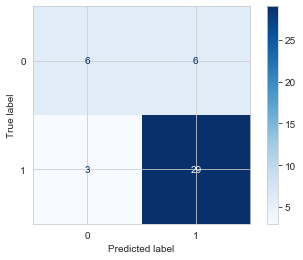

In [78]:
clf_rf=RandomForestClassifier(n_jobs=2,random_state=0)
clf_rf.fit(X_train,y_train)
y_predict=clf_rf.predict(X_test)
plot_confusion_matrix(clf_rf,X_test,y_test, cmap=plt.cm.Blues)
print(classification_report(y_test, y_predict))

In [79]:
score1_rf=accuracy_score(y_test,y_predict)
print("Accuracy (without cross-validation) : {}".format(score1_rf))

score2_rf = cross_val_score(clf_rf, X_train, y_train, cv=10)
print(score2_rf)
print("Accuracy (after cross-validation): {} (+/- {})".format(score2_rf.mean(),score2_rf.std()))

score3_rf = cross_val_score(clf_rf, X_train, y_train, cv=10,scoring=make_scorer(cohen_kappa_score))
print(score3_rf)
print("Cohen Kappa Score (after cross-validation): {} (+/- {})".format(score3_rf.mean(),score3_rf.std()))

Accuracy (without cross-validation) : 0.7954545454545454
[0.88888889 0.88888889 0.88888889 0.88888889 0.88235294 0.94117647
 0.88235294 1.         0.82352941 0.88235294]
Accuracy (after cross-validation): 0.8967320261437909 (+/- 0.04343332738780694)
[0.67857143 0.67857143 0.72307692 0.68421053 0.60465116 0.82105263
 0.60465116 1.         0.33766234 0.60465116]
Cohen Kappa Score (after cross-validation): 0.6737098764148948 (+/- 0.1606253518768655)


## Partitioning the dataset into 10 bins, keeping the imbalance ratio from the original dataset

In [81]:
target_count=data_med.output.value_counts()
print(target_count)

imbalance_target=(target_count[1]/(target_count[0]+target_count[1]))*100
print(imbalance_target)

1    164
0     54
Name: output, dtype: int64
75.22935779816514


In [82]:
def create_bins (df,no_of_bins,orig_imbalance):
    df_class0=df[df['output']==0]
    df_class1=df[df['output']==1]

    len0=int(len(df_class0)/no_of_bins)
    len1=int(len(df_class1)/no_of_bins)

    ind0=0
    ind1=0
    start0=0
    start1=0

    bins=[]

    
    
    print("Original Imbalance in the dataset: {} %".format(orig_imbalance))
    for i in range(no_of_bins):
        ind0+=len0
        ind1+=len1
        bin_=pd.concat([df_class1.iloc[start1:ind1,:],df_class0.iloc[start0:ind0,:]])
        target_cnt=bin_.output.value_counts()
        imbalance=(target_cnt[1]/(target_cnt[0]+target_cnt[1]))*100
        print("Class imbalance ratio in bin {} : {} %".format(i,imbalance))
        bins.append(bin_.values)
        start0+=len0
        start1+=len1

    return bins

In [83]:
bins= create_bins(data_med,10, imbalance_target) 

Original Imbalance in the dataset: 75.22935779816514 %
Class imbalance ratio in bin 0 : 76.19047619047619 %
Class imbalance ratio in bin 1 : 76.19047619047619 %
Class imbalance ratio in bin 2 : 76.19047619047619 %
Class imbalance ratio in bin 3 : 76.19047619047619 %
Class imbalance ratio in bin 4 : 76.19047619047619 %
Class imbalance ratio in bin 5 : 76.19047619047619 %
Class imbalance ratio in bin 6 : 76.19047619047619 %
Class imbalance ratio in bin 7 : 76.19047619047619 %
Class imbalance ratio in bin 8 : 76.19047619047619 %
Class imbalance ratio in bin 9 : 76.19047619047619 %


In [84]:
model_accuracies={} 
model_kappa_scores={}

# Analyzing the number of clusters using Elbow method and Silhouette method

In [85]:
from sklearn.preprocessing import StandardScaler

i=9 


leave_out=i 
test_data=bins[i] 


bin9=np.vstack((bins[j] for j in range(10) if j!=i )) 
data=pd.DataFrame(bin9)
data.columns=d.columns

X_train=data.iloc[:,1:16]
y_train=data.iloc[:,16:17]
X_test=curr_bin.iloc[:,1:16]
y_test=curr_bin.iloc[:,16:17]

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

C:\Users\mindr\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  # Remove the CWD from sys.path while we load stuff.


silhouette 2th score:0.223436 
Distortion or average SSE for 2th cluster is:3.162183 
silhouette 3th score:0.189756 
Distortion or average SSE for 3th cluster is:3.016841 
silhouette 4th score:0.130120 
Distortion or average SSE for 4th cluster is:2.874479 
silhouette 5th score:0.132234 
Distortion or average SSE for 5th cluster is:2.797132 
silhouette 6th score:0.105058 
Distortion or average SSE for 6th cluster is:2.722854 
silhouette 7th score:0.115330 
Distortion or average SSE for 7th cluster is:2.664069 
silhouette 8th score:0.121523 
Distortion or average SSE for 8th cluster is:2.621987 
silhouette 9th score:0.102707 
Distortion or average SSE for 9th cluster is:2.585823 
silhouette 10th score:0.116437 
Distortion or average SSE for 10th cluster is:2.526481 
silhouette 11th score:0.114045 
Distortion or average SSE for 11th cluster is:2.480455 
silhouette 12th score:0.126793 
Distortion or average SSE for 12th cluster is:2.461175 
silhouette 13th score:0.119511 
Distortion or av

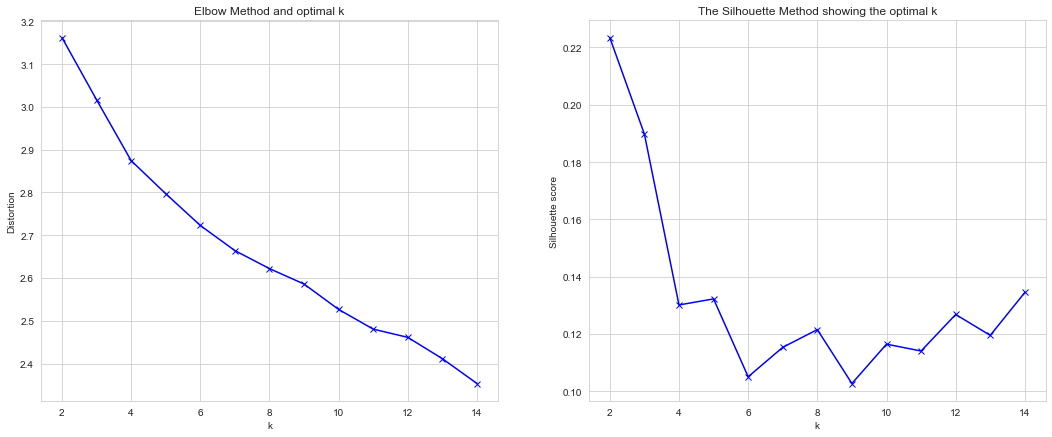

In [86]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

distortions = []
silhouette_scores=[]
K = range(2,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X_train_std)
    kmeanModel.fit(X_train_std)
    labels = kmeanModel.labels_
    silhouette_score=metrics.silhouette_score(X_train_std, labels, metric='euclidean')
    silhouette_scores.append(silhouette_score)
    print("silhouette %dth score:%f "%(k, silhouette_score))
    avg_sse=(sum(np.min(cdist(X_train_std, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X_train_std.shape[0])
    distortions.append(avg_sse)
    print("Distortion or average SSE for %dth cluster is:%f "%(k, avg_sse))

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)
ax1.plot(K, distortions, 'bx-')
ax1.set_xlabel('k')
ax1.set_ylabel('Distortion')
ax1.set_title('Elbow Method and optimal k')
ax2.plot(K, silhouette_scores, 'bx-')
ax2.set_xlabel('k')
ax2.set_ylabel('Silhouette score')
ax2.set_title('The Silhouette Method showing the optimal k')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.22343593330036746
For n_clusters = 3 The average silhouette_score is : 0.19147596146937657
For n_clusters = 4 The average silhouette_score is : 0.12921234455187677
For n_clusters = 5 The average silhouette_score is : 0.12473355484289497
For n_clusters = 6 The average silhouette_score is : 0.12294424451584406
For n_clusters = 7 The average silhouette_score is : 0.11773434774416817
For n_clusters = 8 The average silhouette_score is : 0.11201662797269361


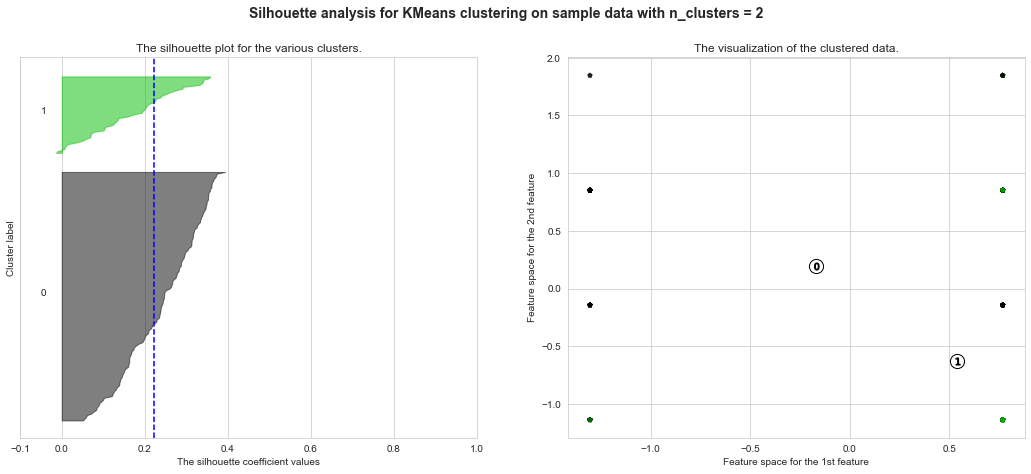

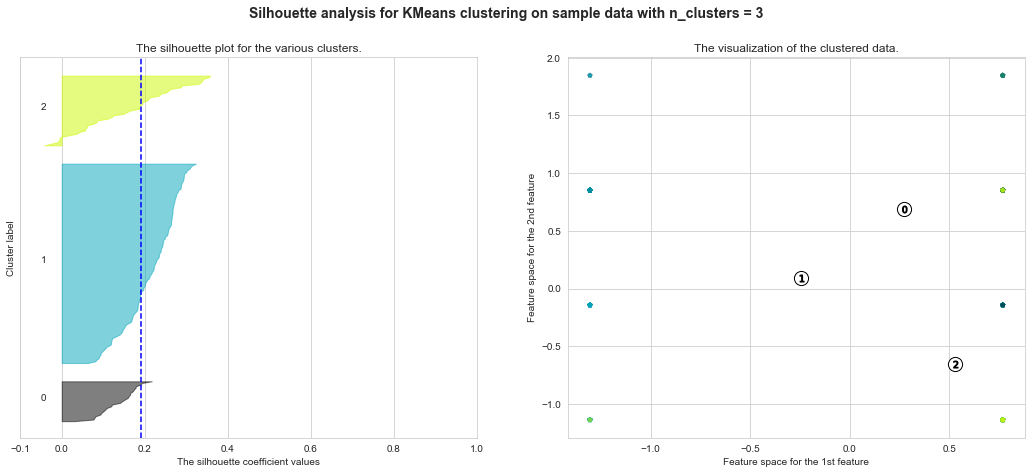

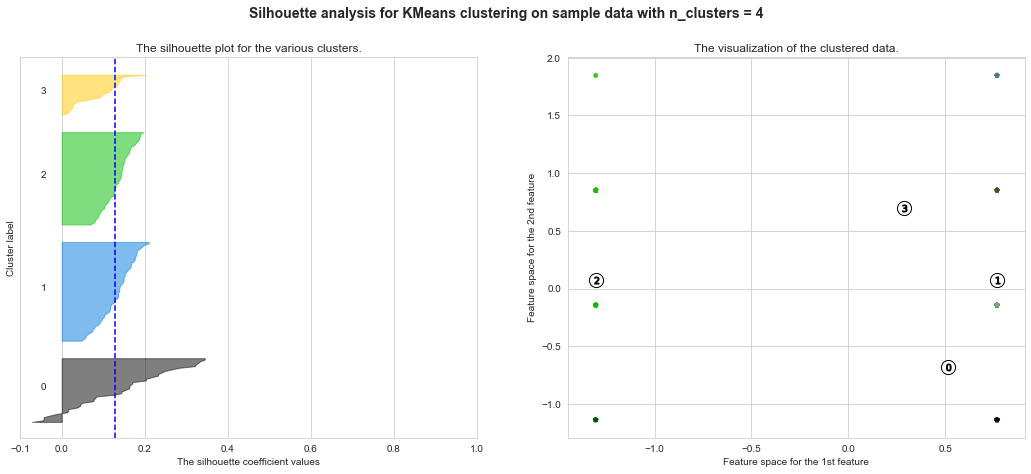

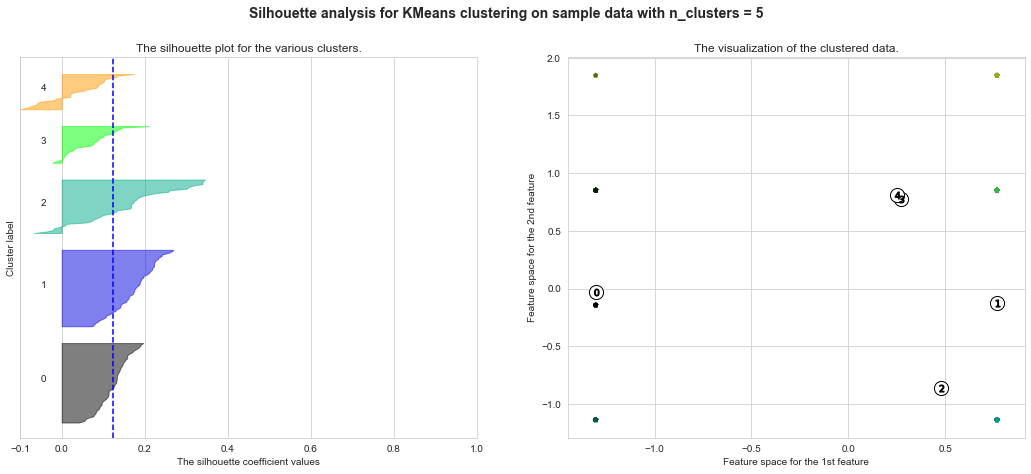

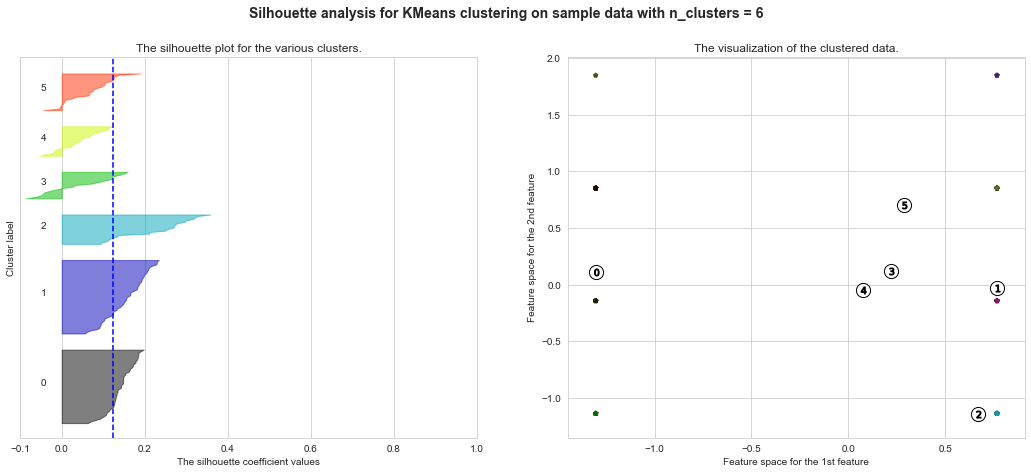

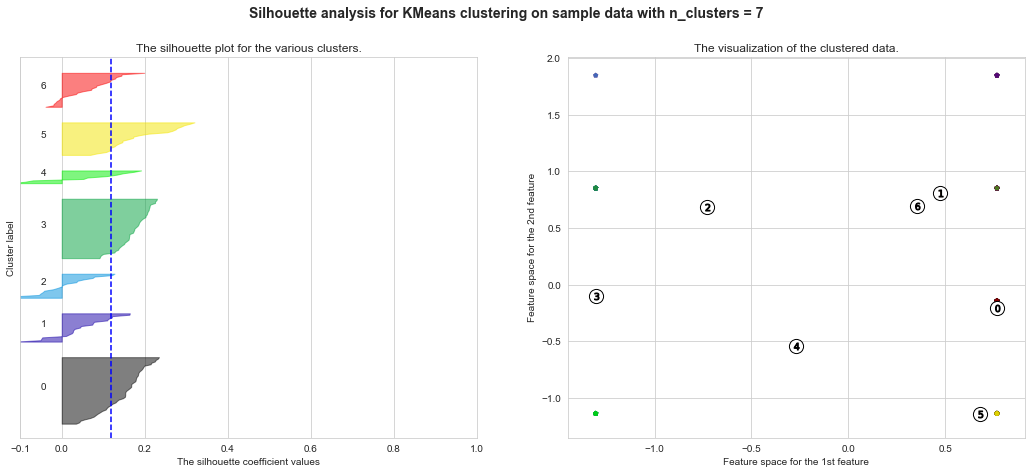

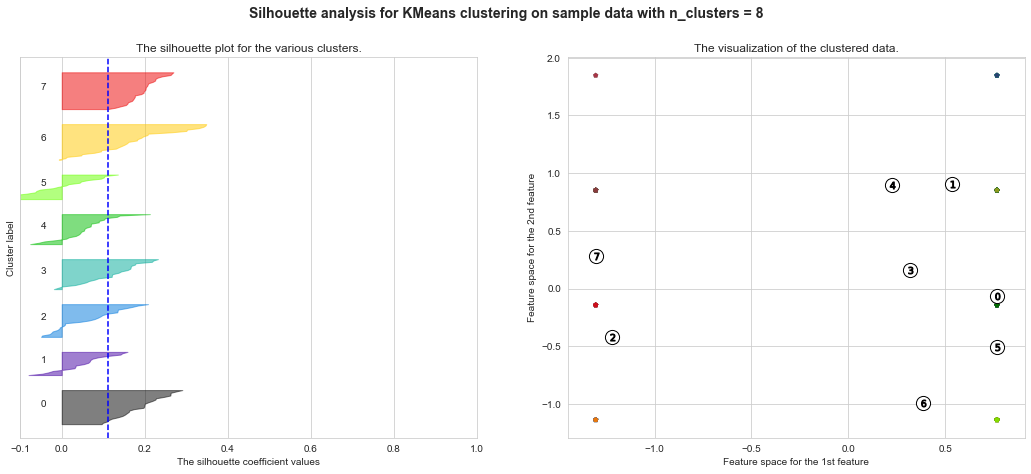

In [87]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


for n_clusters in range(2,9):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X_train_std) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_train_std)


    silhouette_avg = silhouette_score(X_train_std, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    sample_silhouette_values = silhouette_samples(X_train_std, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
       
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.5)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="blue", linestyle="--")

    ax1.set_yticks([])  
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

 
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X_train_std[:, 0], X_train_std[:, 1], marker='p', s=30, lw=0, alpha=0.5,
                c=colors, edgecolor='k')

    
    centers = clusterer.cluster_centers_

    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

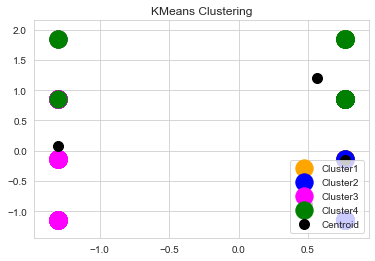

In [88]:
kmeans = KMeans(n_clusters =4, init = 'k-means++', n_init = 10, max_iter = 300, random_state = 0)
y_kmeans = kmeans.fit_predict(X_train_std)
cluster_data=data

cols=list(cluster_data.columns)



plt.scatter(X_train_std[y_kmeans == 0, 0], X_train_std[y_kmeans == 0, 1], s = 300, c = 'orange', label = 'Cluster1')
plt.scatter(X_train_std[y_kmeans == 1, 0], X_train_std[y_kmeans == 1, 1], s = 300, c = 'blue', label = 'Cluster2')
plt.scatter(X_train_std[y_kmeans == 2, 0], X_train_std[y_kmeans == 2, 1], s = 300, c = 'magenta', label = 'Cluster3')
plt.scatter(X_train_std[y_kmeans == 3, 0], X_train_std[y_kmeans == 3, 1], s = 300, c = 'green', label = 'Cluster4')


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'Black', label = 'Centroid')
plt.title('KMeans Clustering')
plt.legend(loc="lower right")
plt.show()

In [89]:
g=globals()


for i in range(0,n_clusters):
    g['cluster_{}'.format(i)] = cluster_df[cluster_df['output']==i]


min_class=0
max_class=1
for i in range(0,n_clusters):
    g['clus_{}_class_{}'.format(i,min_class)] = g['cluster_{}'.format(i)][g['cluster_{}'.format(i)]['output']==min_class]
    if (len(g['clus_{}_class_{}'.format(i,min_class)])!=0):
        g['X{}'.format(i)]=g['cluster_{}'.format(i)].iloc[:,:-1]
        g['y{}'.format(i)]=g['cluster_{}'.format(i)].iloc[:,-1]
        g['clf_{}'.format(i)]=RandomForestClassifier(n_jobs=2,random_state=0)
        g['clf_{}'.format(i)].fit(g['X{}'.format(i)],g['y{}'.format(i)])
        g['Class_val_{}{}'.format(i,min_class)]=min_class
    else:
        g['Class_val_{}{}'.format(i,min_class)]=max_class

## High imabalance Dataset

In [91]:
X=data_high.iloc[:,:-1]
y=data_high.iloc[:,-1]
d = df.copy()

In [92]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

## Baseline 1: Random Forest

C:\Users\mindr\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\mindr\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.89      1.00      0.94        33

    accuracy                           0.89        37
   macro avg       0.45      0.50      0.47        37
weighted avg       0.80      0.89      0.84        37



C:\Users\mindr\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mindr\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


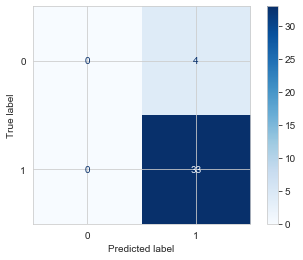

In [93]:
clf_rf=RandomForestClassifier(n_jobs=2,random_state=0)
clf_rf.fit(X_train,y_train)
y_predict=clf_rf.predict(X_test)
plot_confusion_matrix(clf_rf,X_test,y_test, cmap=plt.cm.Blues)
print(classification_report(y_test, y_predict))

In [94]:
score1_rf=accuracy_score(y_test,y_predict)
print("Accuracy (without cross-validation) : {}".format(score1_rf))

score2_rf = cross_val_score(clf_rf, X_train, y_train, cv=10)
print(score2_rf)
print("Accuracy (after cross-validation): {} (+/- {})".format(score2_rf.mean(),score2_rf.std()))

score3_rf = cross_val_score(clf_rf, X_train, y_train, cv=10,scoring=make_scorer(cohen_kappa_score))
print(score3_rf)
print("Cohen Kappa Score (after cross-validation): {} (+/- {})".format(score3_rf.mean(),score3_rf.std()))

Accuracy (without cross-validation) : 0.8918918918918919
[0.93333333 0.86666667 0.86666667 0.93333333 0.93333333 0.92857143
 0.92857143 0.92857143 1.         0.92857143]
Accuracy (after cross-validation): 0.9247619047619049 (+/- 0.03562210325574293)
[0.         0.         0.         0.63414634 0.63414634 0.
 0.         0.         1.         0.        ]
Cohen Kappa Score (after cross-validation): 0.22682926829268296 (+/- 0.3591334007358447)


##  Partitioning the dataset into 10 bins, keeping the imbalance ratio from the original dataset

In [97]:
target_count=data_high.output.value_counts()
print(target_count)

imbalance_target=(target_count[1]/(target_count[0]+target_count[1]))*100
print(imbalance_target)

1    164
0     18
Name: output, dtype: int64
90.10989010989012


In [98]:
def create_bins (df,no_of_bins,orig_imbalance):
    df_class0=df[df['output']==0]
    df_class1=df[df['output']==1]

    len0=int(len(df_class0)/no_of_bins)
    len1=int(len(df_class1)/no_of_bins)

    ind0=0
    ind1=0
    start0=0
    start1=0

    bins=[]

    
    
    print("Original Imbalance in the dataset: {} %".format(orig_imbalance))
    for i in range(no_of_bins):
        ind0+=len0
        ind1+=len1
        bin_=pd.concat([df_class1.iloc[start1:ind1,:],df_class0.iloc[start0:ind0,:]])
        target_cnt=bin_.output.value_counts()
        imbalance=(target_cnt[1]/(target_cnt[0]+target_cnt[1]))*100
        print("Class imbalance ratio in bin {} : {} %".format(i,imbalance))
        bins.append(bin_.values)
        start0+=len0
        start1+=len1

    return bins

In [100]:
bins= create_bins(data_high,10, imbalance_target) 

Original Imbalance in the dataset: 90.10989010989012 %
Class imbalance ratio in bin 0 : 94.11764705882352 %
Class imbalance ratio in bin 1 : 94.11764705882352 %
Class imbalance ratio in bin 2 : 94.11764705882352 %
Class imbalance ratio in bin 3 : 94.11764705882352 %
Class imbalance ratio in bin 4 : 94.11764705882352 %
Class imbalance ratio in bin 5 : 94.11764705882352 %
Class imbalance ratio in bin 6 : 94.11764705882352 %
Class imbalance ratio in bin 7 : 94.11764705882352 %
Class imbalance ratio in bin 8 : 94.11764705882352 %
Class imbalance ratio in bin 9 : 94.11764705882352 %


In [101]:
model_accuracies={} 
model_kappa_scores={}

## Analyzing the number of clusters using Elbow method and Silhouette method

In [102]:
from sklearn.preprocessing import StandardScaler

i=9 


leave_out=i 
test_data=bins[i] 


bin9=np.vstack((bins[j] for j in range(10) if j!=i )) 
data=pd.DataFrame(bin9)
data.columns=d.columns

X_train=data.iloc[:,1:16]
y_train=data.iloc[:,16:17]
X_test=curr_bin.iloc[:,1:16]
y_test=curr_bin.iloc[:,16:17]

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

C:\Users\mindr\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  # Remove the CWD from sys.path while we load stuff.


silhouette 2th score:0.211786 
Distortion or average SSE for 2th cluster is:3.251418 
silhouette 3th score:0.132982 
Distortion or average SSE for 3th cluster is:3.104872 
silhouette 4th score:0.115654 
Distortion or average SSE for 4th cluster is:2.955263 
silhouette 5th score:0.110783 
Distortion or average SSE for 5th cluster is:2.834121 
silhouette 6th score:0.098527 
Distortion or average SSE for 6th cluster is:2.755256 
silhouette 7th score:0.122003 
Distortion or average SSE for 7th cluster is:2.706875 
silhouette 8th score:0.111601 
Distortion or average SSE for 8th cluster is:2.610811 
silhouette 9th score:0.112484 
Distortion or average SSE for 9th cluster is:2.589987 
silhouette 10th score:0.105838 
Distortion or average SSE for 10th cluster is:2.529813 
silhouette 11th score:0.129260 
Distortion or average SSE for 11th cluster is:2.470679 
silhouette 12th score:0.107247 
Distortion or average SSE for 12th cluster is:2.447002 
silhouette 13th score:0.124074 
Distortion or av

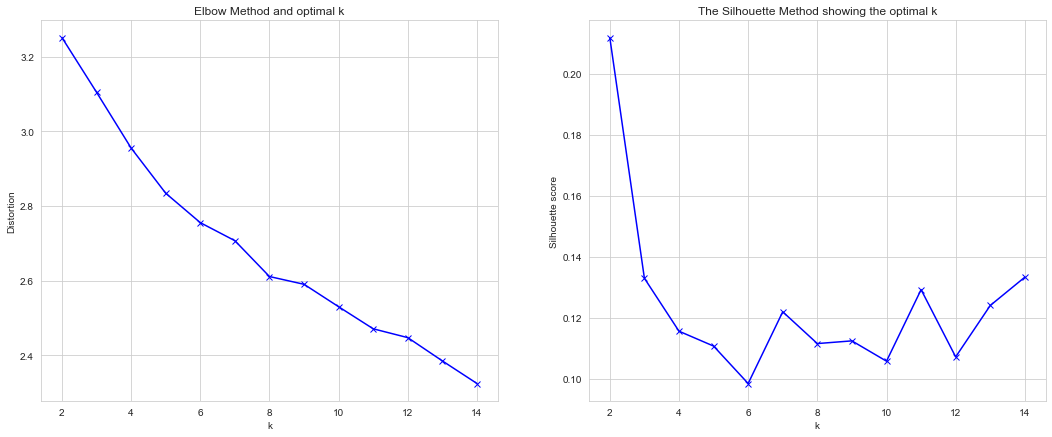

In [103]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

distortions = []
silhouette_scores=[]
K = range(2,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X_train_std)
    kmeanModel.fit(X_train_std)
    labels = kmeanModel.labels_
    silhouette_score=metrics.silhouette_score(X_train_std, labels, metric='euclidean')
    silhouette_scores.append(silhouette_score)
    print("silhouette %dth score:%f "%(k, silhouette_score))
    avg_sse=(sum(np.min(cdist(X_train_std, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X_train_std.shape[0])
    distortions.append(avg_sse)
    print("Distortion or average SSE for %dth cluster is:%f "%(k, avg_sse))

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)
ax1.plot(K, distortions, 'bx-')
ax1.set_xlabel('k')
ax1.set_ylabel('Distortion')
ax1.set_title('Elbow Method and optimal k')
ax2.plot(K, silhouette_scores, 'bx-')
ax2.set_xlabel('k')
ax2.set_ylabel('Silhouette score')
ax2.set_title('The Silhouette Method showing the optimal k')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.1594815062799099
For n_clusters = 3 The average silhouette_score is : 0.10856143419605836
For n_clusters = 4 The average silhouette_score is : 0.1154394732288274
For n_clusters = 5 The average silhouette_score is : 0.10412770482712592
For n_clusters = 6 The average silhouette_score is : 0.11048692049074259
For n_clusters = 7 The average silhouette_score is : 0.11092924212614715
For n_clusters = 8 The average silhouette_score is : 0.104097607475764


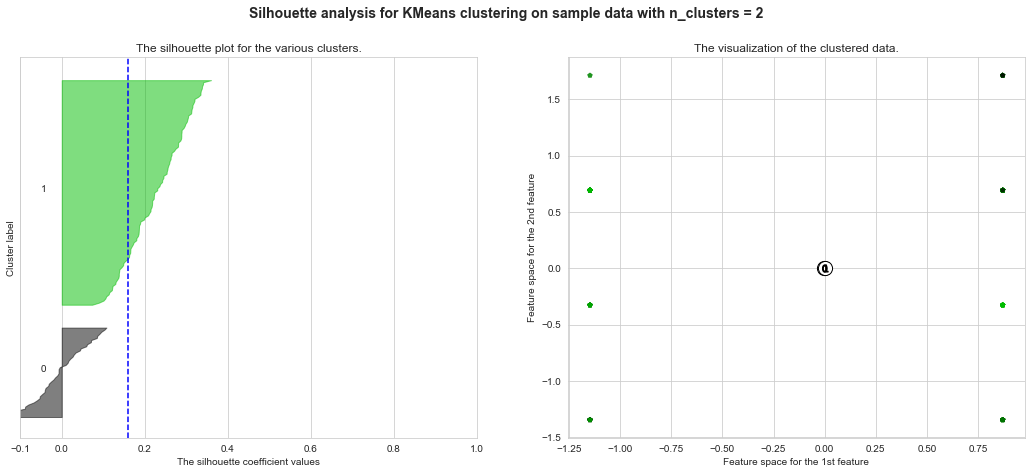

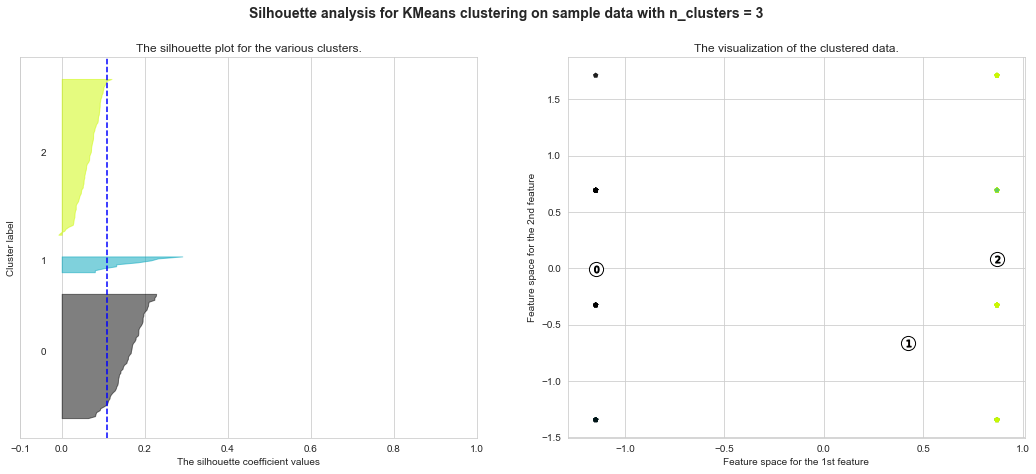

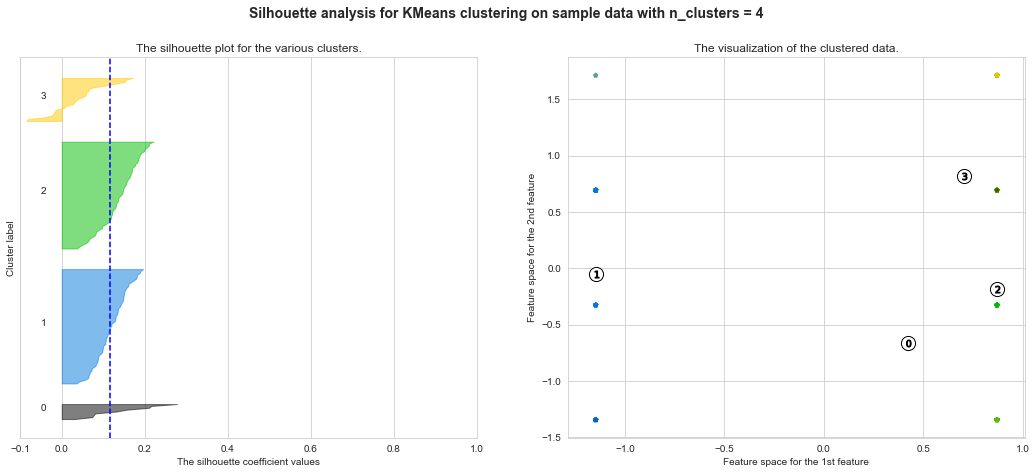

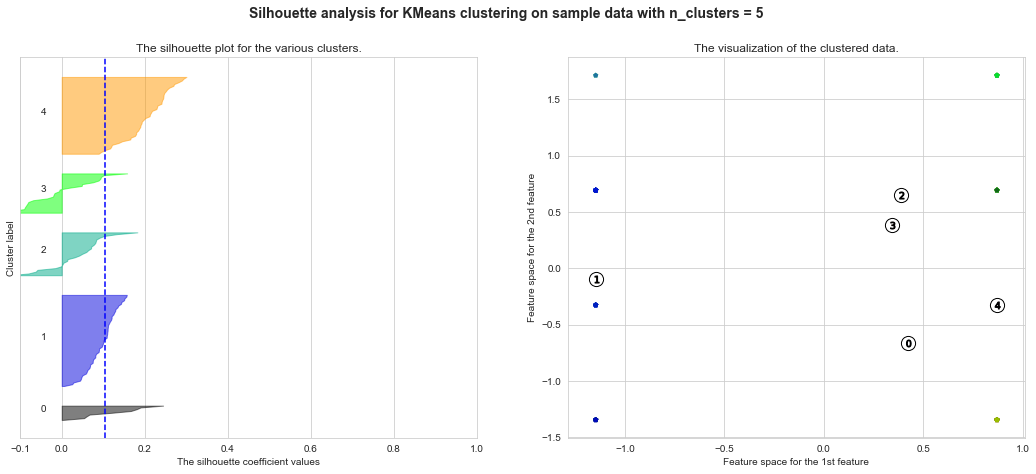

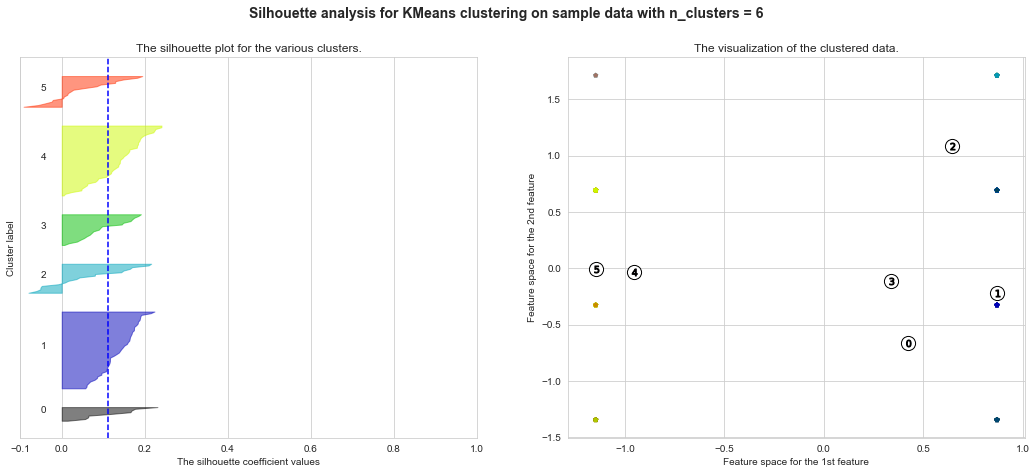

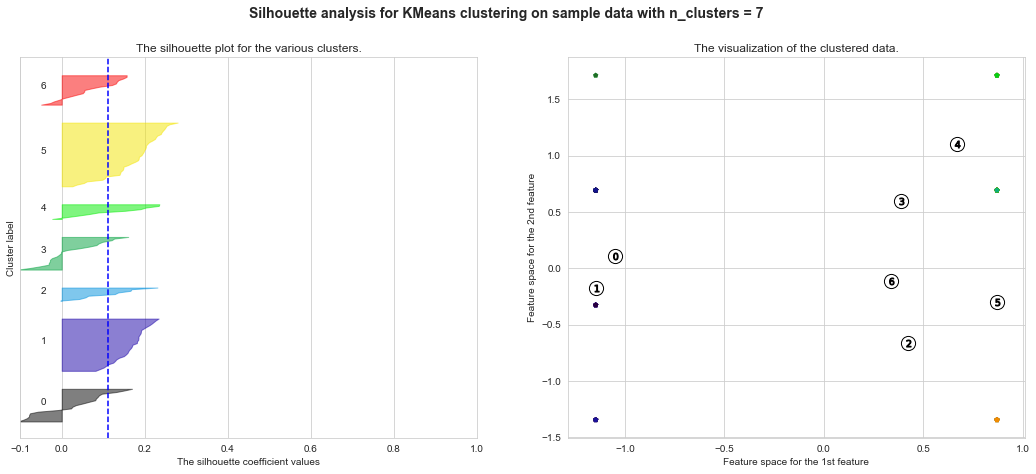

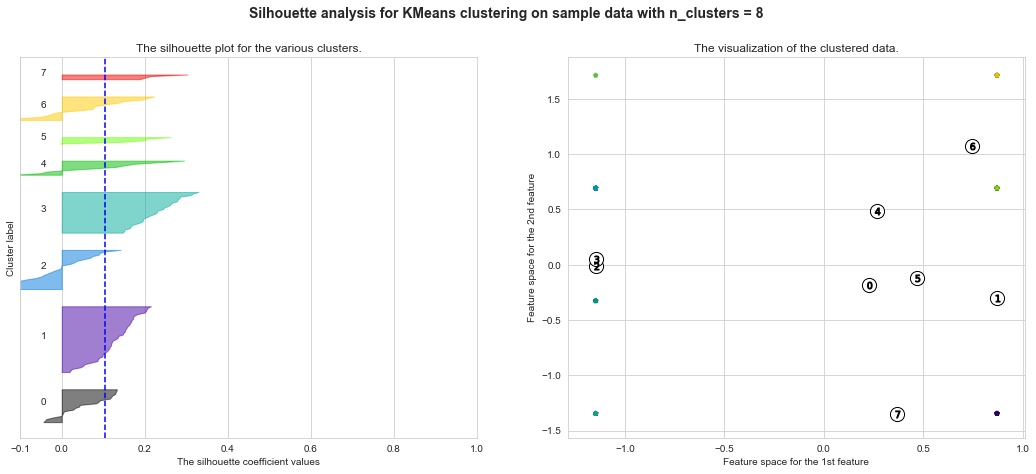

In [104]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


for n_clusters in range(2,9):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X_train_std) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_train_std)


    silhouette_avg = silhouette_score(X_train_std, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    sample_silhouette_values = silhouette_samples(X_train_std, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
       
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.5)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="blue", linestyle="--")

    ax1.set_yticks([])  
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

 
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X_train_std[:, 0], X_train_std[:, 1], marker='p', s=30, lw=0, alpha=0.5,
                c=colors, edgecolor='k')

    
    centers = clusterer.cluster_centers_

    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

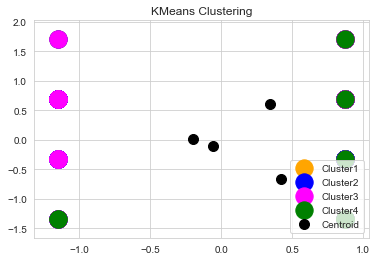

In [105]:
kmeans = KMeans(n_clusters =4, init = 'k-means++', n_init = 10, max_iter = 300, random_state = 0)
y_kmeans = kmeans.fit_predict(X_train_std)
cluster_data=data

cols=list(cluster_data.columns)



plt.scatter(X_train_std[y_kmeans == 0, 0], X_train_std[y_kmeans == 0, 1], s = 300, c = 'orange', label = 'Cluster1')
plt.scatter(X_train_std[y_kmeans == 1, 0], X_train_std[y_kmeans == 1, 1], s = 300, c = 'blue', label = 'Cluster2')
plt.scatter(X_train_std[y_kmeans == 2, 0], X_train_std[y_kmeans == 2, 1], s = 300, c = 'magenta', label = 'Cluster3')
plt.scatter(X_train_std[y_kmeans == 3, 0], X_train_std[y_kmeans == 3, 1], s = 300, c = 'green', label = 'Cluster4')


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'Black', label = 'Centroid')
plt.title('KMeans Clustering')
plt.legend(loc="lower right")
plt.show()

In [106]:
cluster_df=data
cluster_df["Cluster label"]=kmeans.labels_
cols=list(cluster_df.columns)
cols= cols[:-2] + [cols[-1]] + [cols[-2]]
cluster_df=cluster_df[cols]

In [108]:
g=globals()


for i in range(0,n_clusters):
    g['cluster_{}'.format(i)] = cluster_df[cluster_df['output']==i]


min_class=0
max_class=1
for i in range(0,n_clusters):
    g['clus_{}_class_{}'.format(i,min_class)] = g['cluster_{}'.format(i)][g['cluster_{}'.format(i)]['output']==min_class]
    if (len(g['clus_{}_class_{}'.format(i,min_class)])!=0):
        g['X{}'.format(i)]=g['cluster_{}'.format(i)].iloc[:,:-1]
        g['y{}'.format(i)]=g['cluster_{}'.format(i)].iloc[:,-1]
        g['clf_{}'.format(i)]=RandomForestClassifier(n_jobs=2,random_state=0)
        g['clf_{}'.format(i)].fit(g['X{}'.format(i)],g['y{}'.format(i)])
        g['Class_val_{}{}'.format(i,min_class)]=min_class
    else:
        g['Class_val_{}{}'.format(i,min_class)]=max_class


In [109]:
def calc_pvalue(iterations,data_1,data_2,t_obs):
    concat = np.concatenate((data_1,data_2))
    cnt=0
    for i in range(0,iterations):
        perm = np.random.permutation(concat)
        pcurrent = perm[:len(data_1)]
        pnew = perm[len(data_1):]
        mean_perm_current=pcurrent.mean()
        mean_perm_new=pnew.mean()
        t_perm=mean_perm_new-mean_perm_current
        if(t_perm>t_obs):
            cnt+=1
            p_value=cnt/iterations
    return p_value